In [1]:
import pandas as pd
import matplotlib

In [2]:
train = pd.read_csv('~/Downloads/nypd-motor-vehicle-collisions.csv')
train.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-11-16T00:00:00,0:10,MANHATTAN,10010,40.742275,-73.988914,"{'longitude': '-73.988914', 'latitude': '40.74...",5 AVENUE,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,4021880,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-11-16T00:00:00,0:40,NaN,NaN,40.762720,-73.728170,"{'longitude': '-73.72817', 'latitude': '40.762...",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Pavement Slippery,NaN,NaN,NaN,4021727,Sedan,Pick-up Truck,NaN,NaN,NaN
2,2018-11-16T00:00:00,0:45,BROOKLYN,11211,40.710197,-73.958430,"{'longitude': '-73.95843', 'latitude': '40.710...",BORINQUEN PLACE,HAVEMEYER STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4021791,Taxi,Taxi,NaN,NaN,NaN
3,2018-11-16T00:00:00,1:00,BRONX,10454,40.803555,-73.911840,"{'longitude': '-73.91184', 'latitude': '40.803...",EAST 137 STREET,WILLOW AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4021878,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2018-11-16T00:00:00,1:00,BROOKLYN,11221,40.694923,-73.915565,"{'longitude': '-73.915565', 'latitude': '40.69...",WILSON AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4021848,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [3]:
train.columns.to_list()

['DATE',
 'TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'ON STREET NAME',
 'CROSS STREET NAME',
 'OFF STREET NAME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'UNIQUE KEY',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5']

In [4]:
# train.DATE.value_counts().head().plot.bar()
train.DATE.value_counts().head().plot.line()

In [5]:
type(train.DATE)
train.DATE = pd.to_datetime(train.DATE, infer_datetime_format=True)
type(train.DATE)

pandas.core.series.Series

In [6]:
from pandas import Grouper
train.groupby(Grouper(key='DATE', freq='M')).sum().head()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
DATE,,,,,,,,,,,
2012-07-31,589856.500723,-1.070855e+06,4855.0,22.0,855,6,450,3,3550,13,8006752543
2012-08-31,591480.272775,-1.073838e+06,4750.0,27.0,850,15,507,1,3393,11,8436607385
2012-09-30,574179.219528,-1.042394e+06,4689.0,26.0,893,13,434,1,3362,12,7790616930
2012-10-31,581920.216678,-1.056455e+06,4572.0,21.0,977,13,329,1,3260,7,7968470292
2012-11-30,548462.181483,-9.958321e+05,3995.0,14.0,1037,8,277,0,2681,6,7575424083


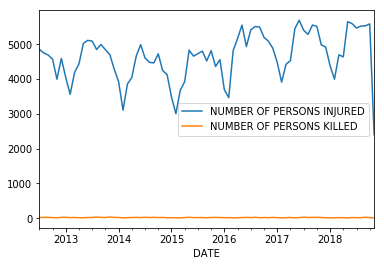

In [7]:
train.groupby(Grouper(key='DATE', freq='M')).sum().plot.line(y=['NUMBER OF PERSONS INJURED', 
                                                                'NUMBER OF PERSONS KILLED'],
                                                            secondary_y=1)

In [8]:
train['UNIQUE KEY'].describe()
train['UNIQUE KEY'].isnull().any()

False

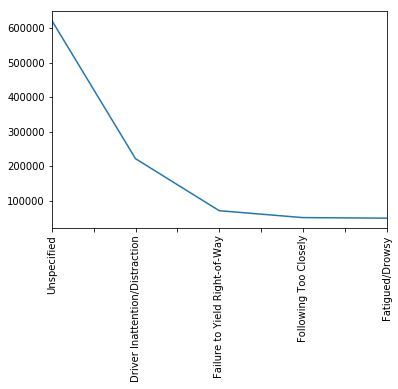

In [9]:
train['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head().plot.line(rot=90)

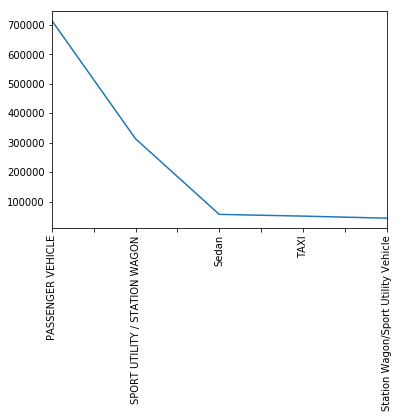

In [10]:
train['VEHICLE TYPE CODE 1'].value_counts().head().plot.line(rot=90)

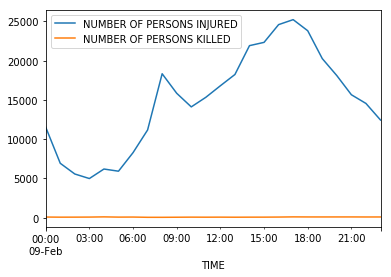

In [11]:
train.TIME = pd.to_datetime(train.TIME, infer_datetime_format=True)

train.groupby(Grouper(key='TIME', freq='H')).sum().plot.line(y=['NUMBER OF PERSONS INJURED', 
                                                                'NUMBER OF PERSONS KILLED'],
                                                            secondary_y=1)

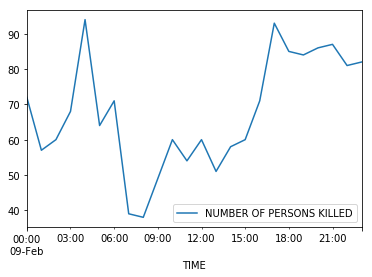

In [12]:
train.groupby(Grouper(key='TIME', freq='H')).sum().plot.line(y='NUMBER OF PERSONS KILLED',
                                                            )

In [13]:
train.groupby('BOROUGH').sum()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
BOROUGH,,,,,,,,,,,
BRONX,5.109961e+06,-9.242094e+06,37644.0,148.0,9207,85,2177,10,26386,54,322776367938
BROOKLYN,1.165269e+07,-2.119582e+07,87426.0,342.0,19821,197,9306,30,58656,113,717114307917
MANHATTAN,9.294865e+06,-1.686753e+07,41242.0,194.0,14432,145,7010,22,20049,27,531776970490
QUEENS,9.917396e+06,-1.798199e+07,66739.0,317.0,13477,179,4584,22,49048,116,621748512313
STATEN ISLAND,1.711804e+06,-3.126288e+06,10633.0,59.0,1613,24,264,2,8813,34,98535942160


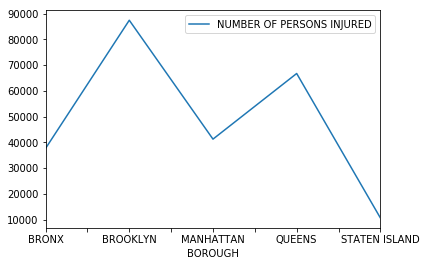

In [14]:
train.groupby('BOROUGH').sum().plot.line(y='NUMBER OF PERSONS INJURED')

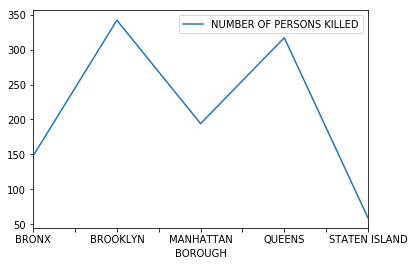

In [15]:
train.groupby('BOROUGH').sum().plot.line(y='NUMBER OF PERSONS KILLED')

In [16]:
import folium
from folium.plugins import MarkerCluster
import datetime

In [17]:
# Folium location values cannot contain nans
train.dropna(inplace=True
            , subset=['LATITUDE', 'LONGITUDE'])

In [18]:
smallTr=train[train['DATE'] >= (train.DATE.max()-datetime.timedelta(hours=48))]

In [19]:
m=folium.Map(location=[smallTr.LATITUDE.mean(), smallTr.LONGITUDE.mean()]
             , tiles='Stamen Toner')
mc = MarkerCluster()
for name, row in smallTr.iterrows():
    folium.CircleMarker(location=[row.LATITUDE, row.LONGITUDE]
                        , radius=row['NUMBER OF PERSONS INJURED']
                        , popup=str(row['NUMBER OF PERSONS INJURED'])
                 ).add_to(mc)
m.add_child(mc)
m